### Compare different runs of the same simulation.
Plot the emittance growth in the presence of phase or amplitude noise (PN and AN respectively) for different runs of the same simulation (machine conditions). The normalised emittance is used here.  

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Plotting parameters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8.5, 7),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [3]:
n_runs = 3 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [4]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/output/'
study_name_template = 'tbt_SPS_noCC_phase_noise1e-8_1e5Nb_1e5turns_VRF_2_37MV_'

#### 2) Plot evolution of the V (vertical emittance) emittance

In [5]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  
/home/natalia/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


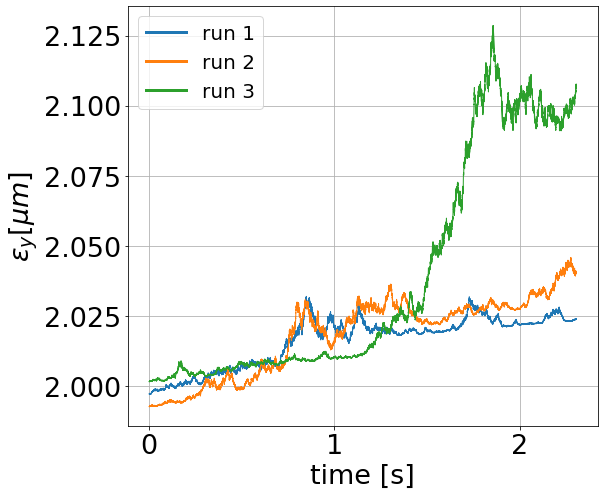

In [6]:
for run in range(n_runs):
    temp_name = 'run{}'.format(run+1) # the suffix of the name of the current study
    my_dict = pickle.load( open( path_to_data+study_name_template+temp_name+'.pkl', "rb" ) )
    
    plt.plot(time, np.array(my_dict['neps_y'])*1e6, c='C{}'.format(run))
    plt.plot(2,2,  label = 'run {}'.format(run+1), c='C{}'.format(run), linewidth = 3) 
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_270GeV_SPS_noCC_ANvsPN1e-8_VRF2_37MV_1e5Nb_1e5turns_3runs.png')